# 1 Introducción
El siguiente cuaderno realiza el cálculo de una matriz homogénea de transformación utilizando CPU.

Los robots clásicos presentan una arquitectura antropomórfica semejante al brazo humano que consisten de una serie de barras rígidas unidas entre sí a través de articulaciones de varios grado de libertad del tipo rotacional o prismática.

En general cada articulación logra su movimiento a través de un accionamiento de potencia e incluye otros dispositivos como reductores de velocidad, frenos y sensores de posición o velocidad.

Estos cálculos se deben realizar a gran velocidad para obtener movimientos rápidos y fluídos, por ende, se desarrollará el algoritmo en CPU para realizar el cálculo rotacional de las articulaciones de un brazo robótico. 

El algoritmo consiste en encontrar una matriz de transformación homogénea rotacional que relacione el sistema de coordenadas del brazo robótico con respecto a las coordenadas de un vector previamente transladado que indique la nueva posición del brazo robótico.

En este ejemplo se muestra el cálculo realizado a partir de la matriz homogénea rotacional, sin embargo, para un movimiento completo del brazo robótico, se debe multiplicar por la matriz de transformación que realiza el movimiento de traslación.

Ilustración del esquema del brazo dónde se generará la matriz de transformación:


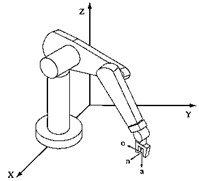

Para lograr esta representación, se utilizan matrices de transformación homogénea de 4x4, la cual incluye las operaciones de rotación:

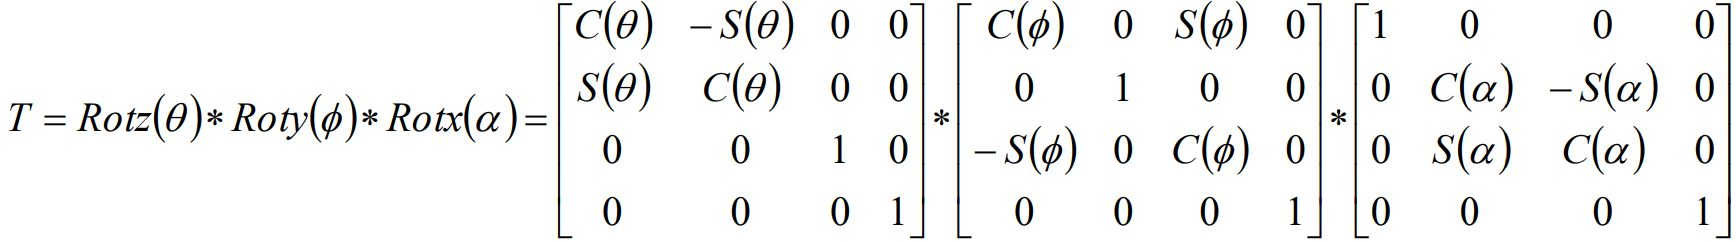

De esta forma, al multiplicar las matrices que representan la rotación de un brazo robótico de 5 articulaciones se puede obtener la siguiente matriz de transformación homogénea:


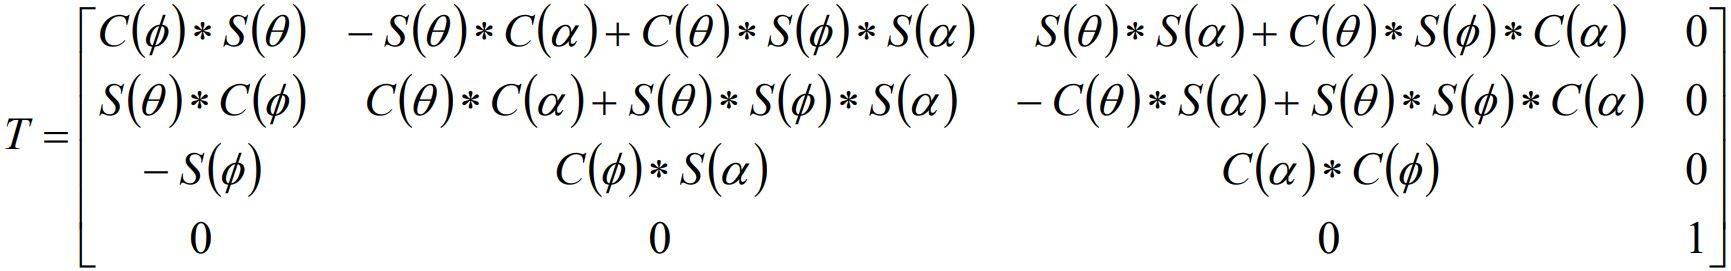


El resultado es la rotación de un sistema con respecto a otro en los ejes coordenados X, Y, Z respectivamente. Si se invierte el orden de la aplicación de las transformaciones, el resultado es diferente.


Con esta representación, llamado método de Ángulos de Euler, se puede obtener la orientación de un sistema de referencia a partir de las matrices de rotación.  


Los ángulos de Euler constituyen un conjunto de tres coordenadas angulares que sirven para especificar la orientación de un sistema de referencia de ejes ortogonales, normalmente móvil, respecto a otro sistema de referencia de ejes ortogonales normalmente fijos.


El objetivo de este algoritmo es realizar el cálculo de la transformación de una matriz homogénea rotacional a partir de los ángulos ingresados y las coordenadas de un vector tridimensional en CPU.

---
# 2 Armado del ambiente
No es necesario instalar el módulo CUDA de Python.

---
# 3 Desarrollo
Se ejecuta el Código CPU - GPU.

In [2]:
#@title Ingresar ángulos para construir la matriz homogénea de transformación de rotación de brazo robótico
###number_input_tita = 10.0 #@param {type:"number"}
tita = 90 #@param {type:"slider", min:0, max:90, step:0.1}

#number_input_fi = 10.0 #@param {type:"number"}
fi = 90 #@param {type:"slider", min:0, max:90, step:0.1}

#number_input_alfa = 10.0 #@param {type:"number"}
alfa = 90 #@param {type:"slider", min:0, max:90, step:0.1}

#@markdown Coordenadas del vector en 3D para realizar la transformación a partir de la matriz homogéna:

coordenada_X = 435 #@param {type:"number"}

coordenada_Y =  435#@param {type:"number"}

coordenada_Z = 435 #@param {type:"number"}

import numpy as np

from datetime import datetime
tiempo_total = datetime.now()

TAM_MAT = 4

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

# CPU - Se genera la matriz homogénea en cpu:
matriz_homogenia = np.array([   [ np.cos(fi)*np.sin(tita), -np.sin(tita)*np.cos(alfa)+np.cos(tita)*np.sin(fi)*np.sin(alfa), np.sin(tita)*np.sin(alfa)+np.cos(tita)*np.sin(fi)*np.cos(alfa),0],
                                [ np.sin(tita)*np.cos(fi),np.cos(tita)*np.cos(alfa)+np.sin(tita)*np.sin(fi)*np.sin(alfa),-np.cos(tita)*np.sin(alfa)+np.sin(tita)*np.sin(fi)*np.cos(alfa),0],
                                [ -np.sin(fi),np.cos(fi)*np.sin(alfa),np.cos(alfa)*np.cos(fi),0],
                                [ 0,0,0,1],])

# CPU - Se define el tipo de dato en la matriz(float):
matriz_homogenia = matriz_homogenia.astype(np.float32)

# CPU - Se genera la matriz correspondiente al vector transladado:
mat_de_vector_trasladado = np.array([     [ coordenada_X,0,0,0 ],
                                          [ 0,coordenada_Y,0,0 ],
                                          [ 0,0,coordenada_Z,0 ],
                                          [ 0,0,      0     ,1 ]])

# CPU - Se define el tipo de dato en vector(float):
mat_de_vector_trasladado = mat_de_vector_trasladado.astype(np.float32)

# CPU - Se define la memoria de la matriz resultado:
mat_resultado = np.empty([TAM_MAT, TAM_MAT])
mat_resultado = mat_resultado.astype(np.float32)

print("Matriz Homogénea: ")
print(matriz_homogenia)

print("\nMatriz Representantiva del Vector Previamente Transladado: ")
print(mat_de_vector_trasladado)


inicio = datetime.now()

# CPU - Se itera sobre las filas de la matriz homogenea
for i in range(TAM_MAT):
   # CPU - Se itera sobre las columnas de la matriz del vector trasladado
   for j in range(TAM_MAT):
     # CPU - Se itera guardando el resultado
       for k in range(TAM_MAT):
           mat_resultado[i][j] += matriz_homogenia[i][k] * mat_de_vector_trasladado[k][j]

fin = datetime.now()

print ("\nTiempo de ejecución en CPU: %.5f ms"%tiempo_en_ms(fin-inicio))

print("\nMatriz resultado de la transformación: ")
print(mat_resultado)

Matriz Homogénea: 
[[-0.40057632  0.04246243  0.9787177   0.        ]
 [-0.40057632  0.915279    0.04246243  0.        ]
 [-0.89399666 -0.40057632  0.20076996  0.        ]
 [ 0.          0.          0.          1.        ]]

Matriz Representantiva del Vector Previamente Transladado: 
[[435.   0.   0.   0.]
 [  0. 435.   0.   0.]
 [  0.   0. 435.   0.]
 [  0.   0.   0.   1.]]

Tiempo de ejecución en CPU: 0.19500 ms

Matriz resultado de la transformación: 
[[-174.2507     18.471155  425.7422      0.      ]
 [-174.2507    398.14636    18.471155    0.      ]
 [-388.88855  -174.2507     87.33493     0.      ]
 [   0.          0.          0.          1.      ]]


---
# 4 Tabla de pasos de ejecución del programa


 Procesador | Función | Detalle
------------|---------|----------
CPU      |  @tita                | Lectura del ángulo tita.
CPU      |  @fi                | Lectura del ángulo fi.
CPU      |  @alfa                | Lectura del ángulo alfa.
CPU      |  @coordenada_X               | Lectura de la coordenada X del vector trasladado.
CPU      |  @coordenada_Y                | Lectura de la coordenada Y del vector trasladado.
CPU      |  @coordenada_Z                | Lectura de la coordenada Z del vector trasladado.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  datetime.now()        | Toma el tiempo actual.
CPU      |  np.array() | Genera las matrices.
CPU      |  astype() | Define el tipo de dato.
CPU      |  -        | Se realiza la multiplicación de las matrices en CPU. 
CPU      |  tiempo_en_ms()               | Calcula el tiempo en ms.
CPU      |  print()               | Informa los resultados.



---
# 5 Conclusiones
En este ejercicio se aplicó la metodología para encontrar Matrices de Transformación Homogénea de rotación en un caso particular para el cálculo rotacional de un brazo de 5 posiciones que puede ser extrapolable a otros tipos de brazo a partir de cálculos realizados por CPU. 

La idea de este ejercicio es mostrar un ejemplo de aplicación de cálculos de movimientos rotacionales de extremidades robóticas utilizando la potencia del CPU en forma secuencial.


---
# 6 Bibliografia

[1] The homogeneous transformation matrix: [Web](http://planning.cs.uiuc.edu/node111.html)

[2] Cinemática de Robots: [PDF](https://nbio.umh.es/files/2012/04/practica2.pdf) 

[3] Application of Homogeneous Transformation Matrices to the Simulation of VLP Systems: [PDF](https://www.researchgate.net/publication/322337716_Application_of_Homogeneous_Transformation_Matrices_to_the_Simulation_of_VLP_Systems#:~:text=In%20robotics%2C%20Homogeneous%20Transformation%20Matrices,a%20robot%20component%20%5B1%5D.)

[4] SIMULACIÓN DE MOVIMIENTOS DE UN BRAZO ROBÓTICO CON 5 GRADOS DE LIBERTAD: [PDF](https://repository.unilibre.edu.co/bitstream/handle/10901/9474/Tesis%20de%20Grado.%20Prototipo%20de%20Brazo%20Rob%C3%B3tico%20Para%20Vacunacion%20de%20Ganado..pdf?sequence=1&isAllowed=y)

[5] Documentación Numby: [WEB](https://numpy.org/)

[6] Repositorio de Numby: [WEB](https://github.com/numpy/numpy)

[7] Video de Matrices de transformación homogéneas con ejemplos: [Video](https://www.youtube.com/watch?v=Kgj3y8K3AD8)


